In [ ]:
#!pip install --upgrade qiskit

In [1]:
from qiskit import IBMQ
IBMQ.save_account('ibm id',overwrite=True)

In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
#from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [3]:
from math import pi

# import Qiskit
from qiskit import Aer, IBMQ, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [5]:
#!pip install qiskit-machine-learning

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.utils import algorithm_globals
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN

algorithm_globals.random_seed = 42

In [7]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [8]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [9]:
boston.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [10]:
boston['MEDV']=boston_dataset.target

In [11]:
boston['MEDV']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

# Data preprocessing

In [12]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [13]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y= boston['MEDV']
#Y=pd.DataFrame(np.c_[boston['MEDV']],columns=['MEDV'])

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0 2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [15]:
X_train

,LSTAT,RM
33,18.35,5.701
283,3.16,7.923
418,20.62,5.957
502,9.08,6.120
402,20.31,6.404
...,...,...
486,14.98,6.114
189,5.39,7.185
495,17.60,5.670
206,10.97,6.326


In [16]:
y=Y_train.to_numpy()

In [17]:
len(y)

404

In [18]:
from sklearn.decomposition import PCA
n=2
pca = PCA(n_components=n).fit(X_train)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

print("Size of traaining",len(X_train))
print("Size of test",len(X_test))

Size of traaining 404
Size of test 102


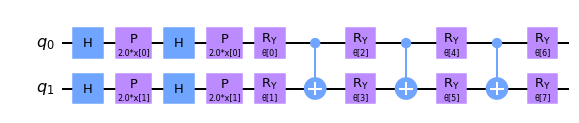

In [19]:
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap,ZFeatureMap,TwoLocal,EfficientSU2
qc = QuantumCircuit(n)
feature_map = ZFeatureMap(n)
ansatz = RealAmplitudes(n)
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)
qc.draw(output="mpl")
qc.decompose().draw(output='mpl')

In [20]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [21]:
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B,ADAM,SPSA
vqr = VQR(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=L_BFGS_B(maxiter=20),
    callback=callback_graph,
)

In [22]:
yt=Y_test.to_numpy()

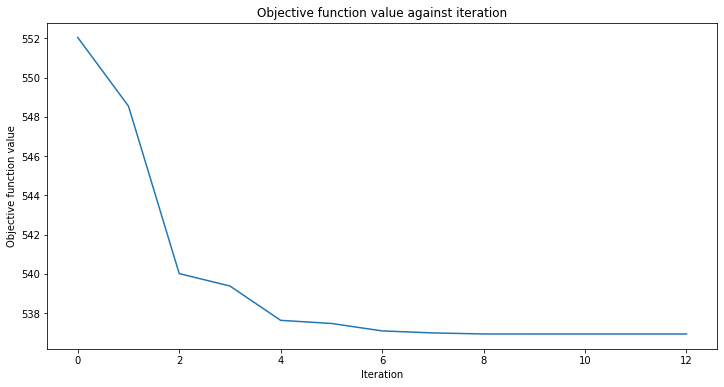

In [23]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit regressor
vqr.fit(X_test, yt)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score result
#vqr.score(X_train, y)

In [24]:
vqr.score(X_test, yt)

-5.858032952154333

In [25]:
labels_test = vqr.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(labels_test, yt)

536.9419315260394

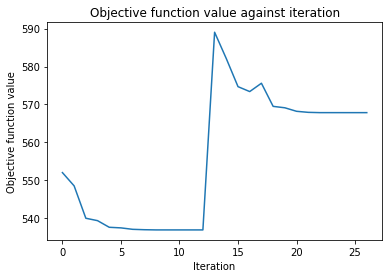

-5.610420659641966

In [27]:
vqr.fit(X_train, y)
vqr.score(X_train, y)

In [28]:
labels_test = vqr.predict(X_train)

In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(labels_test, y)

567.8463562913462